## Package Installation

In [1]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=2c9eeebc86cdaad32e07a2e16b08cf1ad1e7f3d9893a779955311906214af89e
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 36.4 MB/s eta 0:00:00


#Import Library

In [2]:
from qiskit import *
from qiskit.visualization import plot_state_qsphere, plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Operator, Statevector
from qiskit_aer import AerSimulator
import math
import random

#Task 1
**Create a simple entangled quantum circuit and conduct a measurement operation on it using AER simulator and show the results in a histogram.**

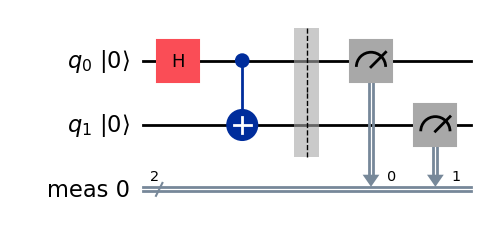

In [3]:
# Creation of a 2-qubit quantum circuit
qc = QuantumCircuit(2)

# Step 1: Prepare the entanglement (phi+ Bell pair entanglement)
qc.h(0)
qc.cx(0, 1)

# Step 2: Measures all qubits and stores it in a single classical register
qc.measure_all()

# Draw the circuit
qc.draw(output='mpl', initial_state = True)

In [4]:
# Run the circuit in a asimulator 1000 times and print out the result
circ = transpile(qc, AerSimulator())
res = AerSimulator().run(circ, shots = 1000).result()
counts = res.get_counts(circ)
print(counts)

{'11': 517, '00': 483}


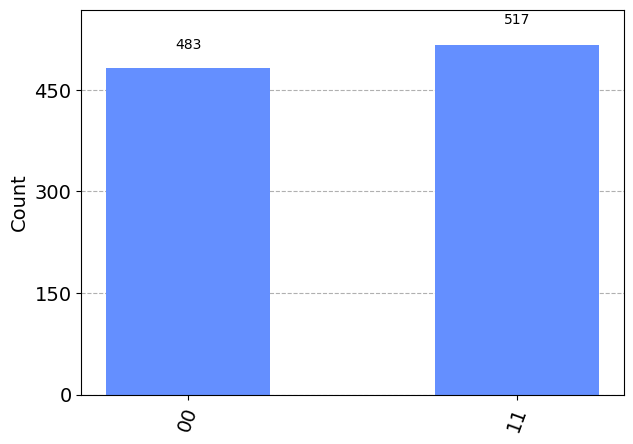

In [5]:
# Plotting the result in a histogram
plot_histogram(counts)

#Task 2
**i. Create a 3 qubit quantum circuit with the gates CCX , H, SX ( 𝑋 gate) in such a way that you always have roughly ¼ probability to get state |1> from the target qubit. Show the results in the form of a histogram**

**ii. Alter the above circuit and measure them in Y basis and show the result in a histogram. Comment on any differences observed between the two results.**

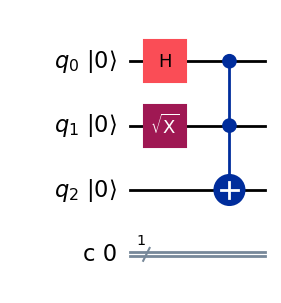

In [24]:
# SECTION i
# Creation of a 3-qubit quantum circuit
qc = QuantumCircuit(3, 1)

# Applying gates
qc.h(0) # Makes the first qubit to be in a superpositioned state such that it has equal probability of being in |0> or |1> state
qc.sx(1) # Rotates the second qubit around the X-axis of the Bloch sphere by π/2 radians
qc.ccx(0, 1, 2) # Controlled not gate for 3 qubit with first two qubits as control qubits

#drawing circuit
qc.draw(output = 'mpl', initial_state=True)

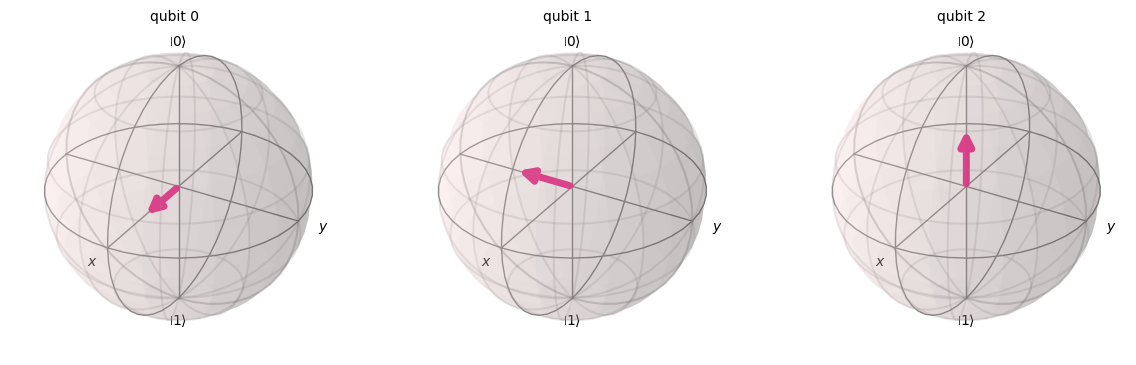

In [25]:
# Blochsphere Representation
statevector = Statevector(qc)

array_to_latex(statevector)
plot_bloch_multivector(statevector)

In [26]:
# Measurement on Z basis
qc.measure(2,0) # Mesures the third or target qubit of CCX gate and stores it in a classical bit

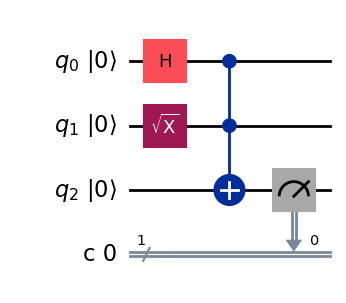

In [27]:
#drawing circuit after measurement
qc.draw(output = 'mpl', initial_state=True)

In [28]:
# Running the code in a simulator 10000 times and printing the result
circ = transpile(qc, AerSimulator()) #Transpile converts the circuit to a format supported by the simulator
res = AerSimulator().run(circ, shots = 10000).result()
counts = res.get_counts(circ)
print(counts)

{'0': 7529, '1': 2471}


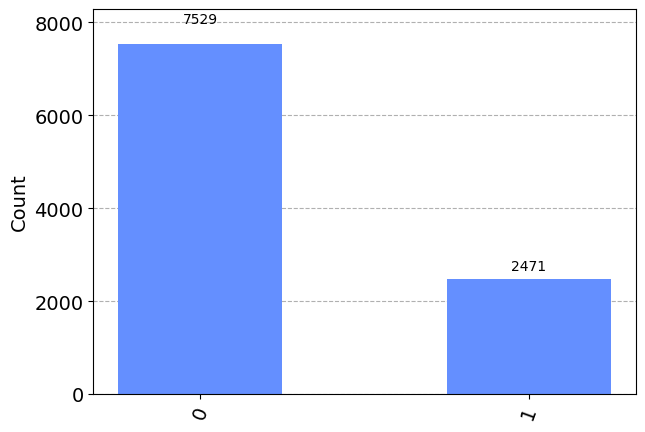

In [29]:
# Showing the result on a histogram
plot_histogram(counts)

# Here, the third qubit will be in |1> state only if the first two qubits are both in |1> state. Since we have applied hadamard gate on the first qubit and SX gate on the second one,
# both of the qubits have equal probabilty of being at either |0> or |1> state when measured on z basis. So, the probability of both qubits being in state |1> is 0.5*0.5 = 0.25.
# So, when the third qubit is measured it has 1/4 proability for being in state |1>

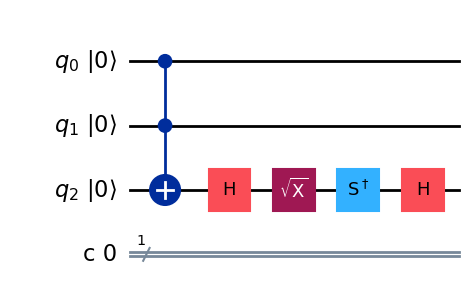

In [30]:
# SECTION ii
# Creation of a 3-qubit quantum circuit
qc = QuantumCircuit(3, 1)

# Applying gates
qc.ccx(0, 1, 2) # Controlled not gate for 3 qubit with first two qubits as control qubits
qc.h(2) # Makes the third qubit to be in a superpositioned state such that it has equal probability of being in |0> or |1> state
qc.sx(2) # Rotates the third qubit around the X-axis of the Bloch sphere by π/2 radians

# Y-Basis measurement preparation
qc.sdg(2) # Rotates the third qubit around the Z-axis of the Bloch sphere by π/2 radians in the inverse direction of S gate
qc.h(2)

#drawing circuit
qc.draw(output = 'mpl', initial_state=True)

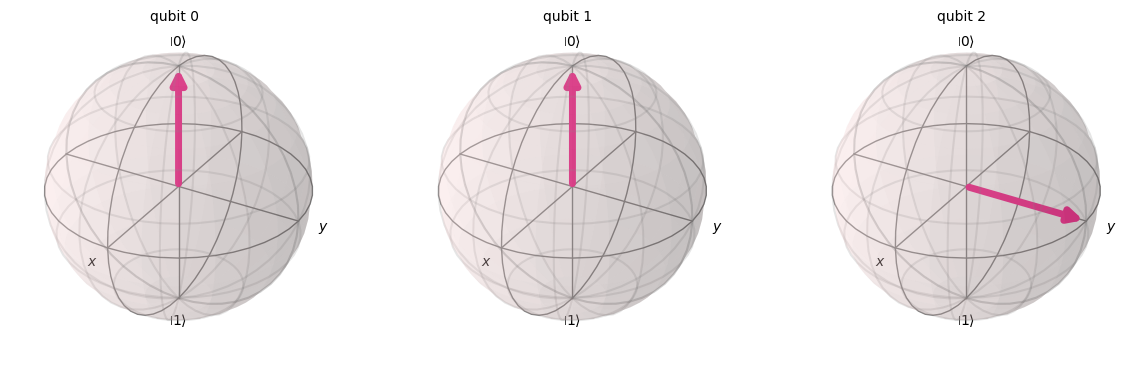

In [31]:
# Blochsphere Representation
statevector = Statevector(qc)

array_to_latex(statevector)
plot_bloch_multivector(statevector)

In [32]:
# Measurement
qc.measure(2,0) # Mesures the third qubit and stores it in a classical bit

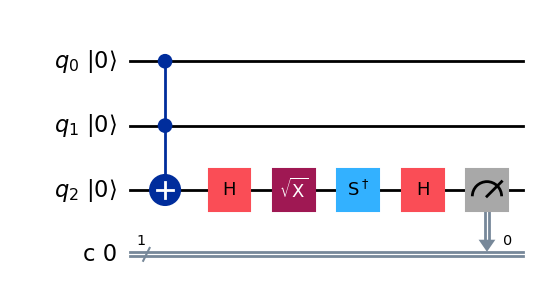

In [33]:
#drawing circuit after measurement
qc.draw(output = 'mpl', initial_state=True)

In [34]:
# Running the code in a simulator 10000 times and printing the result
circ = transpile(qc, AerSimulator())
res = AerSimulator().run(circ, shots = 10000).result()
counts = res.get_counts(circ)
print(counts)

{'1': 5025, '0': 4975}


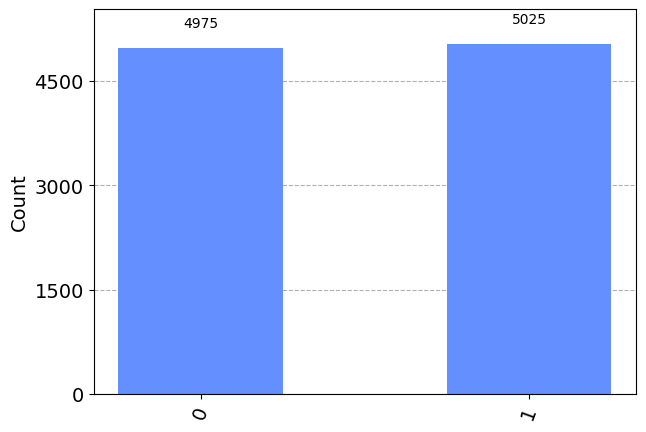

In [35]:
# Showing the result on a histogram
plot_histogram(counts)

# In this case, the probability of getting |1> is equal to that of getting |0>, unlike the section i. It is because in order to measure on the y basis we need to change the order of applying the gates. We first apply CCX gate
# taking first and second qubit as control qubits and then apply H, SX, SDG, H gates on the target qubit (third qubit) consecutively. AS the first two qubits are intially in |0> state, after applying CCX gate the target quibit will remain
# unchaged (|0> state). After that we apply H gate and the qubit is rotated and aligns itself with X-axis of the blochsphere. Then SX gate rotates the qubit arounf X-axis but as the qubit is already on X-axis it does not change anything.
# Then we apply SDG gate and the qubit is rotated around Z-axis in the inverse direction of S gate and the qubit aligns itself with the Y-axis of the blochsphere. Now, when we measure the qubit (by default on z basis) after applying
# H gate again, there is equal probability of it being in |0> or |1> state. Thus, we get State |1> approximately half the time in this case.

#Task 3
According to IBM’s documentation on quantum state teleportation, the quantum state teleportation protocol can be verified by applying a randomly generated single-qubit gate to the initialized |0> state of the first qubit to obtain a random quantum state vector to be teleported. After the protocol is run, the inverse of the gate can be applied to Bob and by measuring to see if it has returned to the |0> state. You are tasked with verifying this statement on Qiskit by using the Quantum State Teleporation Protocol shown in class. Apply this randomly generated gate and its inverse to the teleportation circuit and then show the results in the histogram. Your code will be deemed correct if the bottom-most value of all the values in the histogram shows 0.

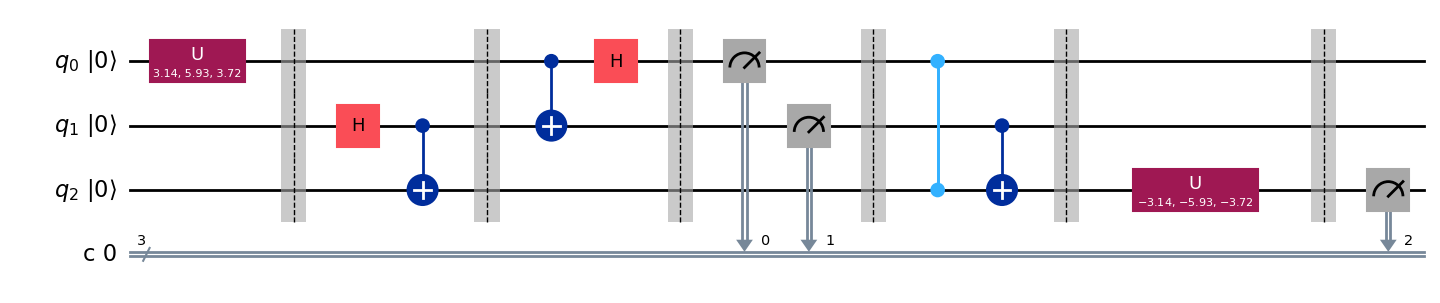

In [67]:
# Creation of a Quantum Circuit with 3 qubits and 2 classical bits
qc = QuantumCircuit(3, 3)

# QUBIT ORDERING
# q0 = State to be teleported
# q1 = Qubit of Alice
# q2 = Destination of teleportation and qubit of Bob

# Generate random parameters for creating a random gate U
theta = 2 * math.pi * random.random() # Generates a random real number between 0 and 2*pi
phi = 2 * math.pi * random.random() # Generates a random real number between 0 and 2*pi
lam = 2 * math.pi * random.random() # Generates a random real number between 0 and 2*pi

# Step 1: Prepare the initial random state to be teleported in qubit 0
qc.u(theta, phi, lam, 0) # Apply an U gate to qubit 0 to prepare a random state.
qc.barrier()

# Step 2: Create Bell pair between qubit 1 and 2
qc.h(1) # Apply Hadamard gate on qubit 1
qc.cx(1, 2) # Apply CNOT gate with qubit 1 as control and qubit 2 as target
qc.barrier()

# Step 3: Prepare q0 and q1 for measurement
qc.cx(0, 1) # Apply CNOT gate with qubit 0 as control and qubit 1 as target
qc.h(0) # Apply Hadamard gate on qubit 0
qc.barrier()

# Step 4: Measure qubit 0 and 1
qc.measure([0, 1], [0, 1]) # Measure qubit 0 and 1 and store result in classical bits 0 and 1
qc.barrier()

# Step 5: Conditional application gates on qubit 2 depending on the classical bits
qc.cz(0, 2) # Apply CZ gate with qubit 0 as control and qubit 2 as target. Basically applying a Z gate if the measurement of q0 is 1. Does nothing if the measurement of q0 is 0
qc.cx(1, 2) # Apply CNOT gate with qubit 1 as control and qubit 2 as target. Applies an X gate if the measurement of q1 is 1 and does nothing if measurement of q1 is 0
qc.barrier()

# Apply inverse of U gate to get the initial state of q0
qc.u(-theta, -phi, -lam, 2) # Apply an inverse U gate to qubit 2 to get the initial state |0> from which the random gate was generated by applying U gate.
qc.barrier()

# Measure Bob's qubit to check whether q0 was teleported or not. If teleported the bottom qubit in histogram will be 0 for all cases.
qc.measure(2,2)

# Draw the circuit
qc.draw(output='mpl', initial_state = True)

In [68]:
# Running the code in a simulator 10000 times and printing the result
circ = transpile(qc, AerSimulator())
res = AerSimulator().run(circ, shots = 10000).result()
counts = res.get_counts(circ)
print(counts)

{'011': 2562, '010': 2470, '000': 2506, '001': 2462}


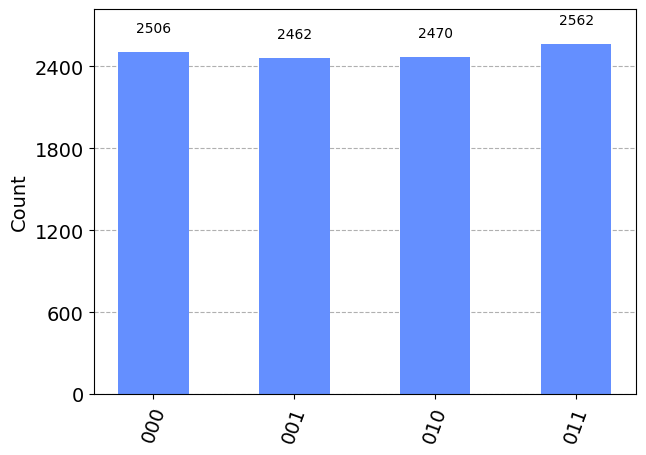

In [69]:
# Showing the result on a histogram
plot_histogram(counts)

#Task 4
**You are tasked to carry out a unitary operation mathematically transform ∣Φ+⟩ to ∣Ψ−⟩ and then draw the corresponding circuit of it.**

In [54]:
# First we prepare phi+ state from |00> state.
# i. Apply Hadamard gate on qubit 1
# ii. Apply a CNOT gate taking qubit 2 as the target qubit
# Then we apply Z and X gate on qubit 2. The result will be Psi- state.

# Creation of a 2-qubit quantum circuit
qc = QuantumCircuit(2)

# Step 1: Prepare the entanglement (phi+ Bell pair entanglement)
qc.h(0)
qc.cx(0, 1)

# Step 2: Prepare the entanglement (psi- Bell pair entanglement)
qc.z(1)
qc.x(1)



**Preparation of phi+ state:**

  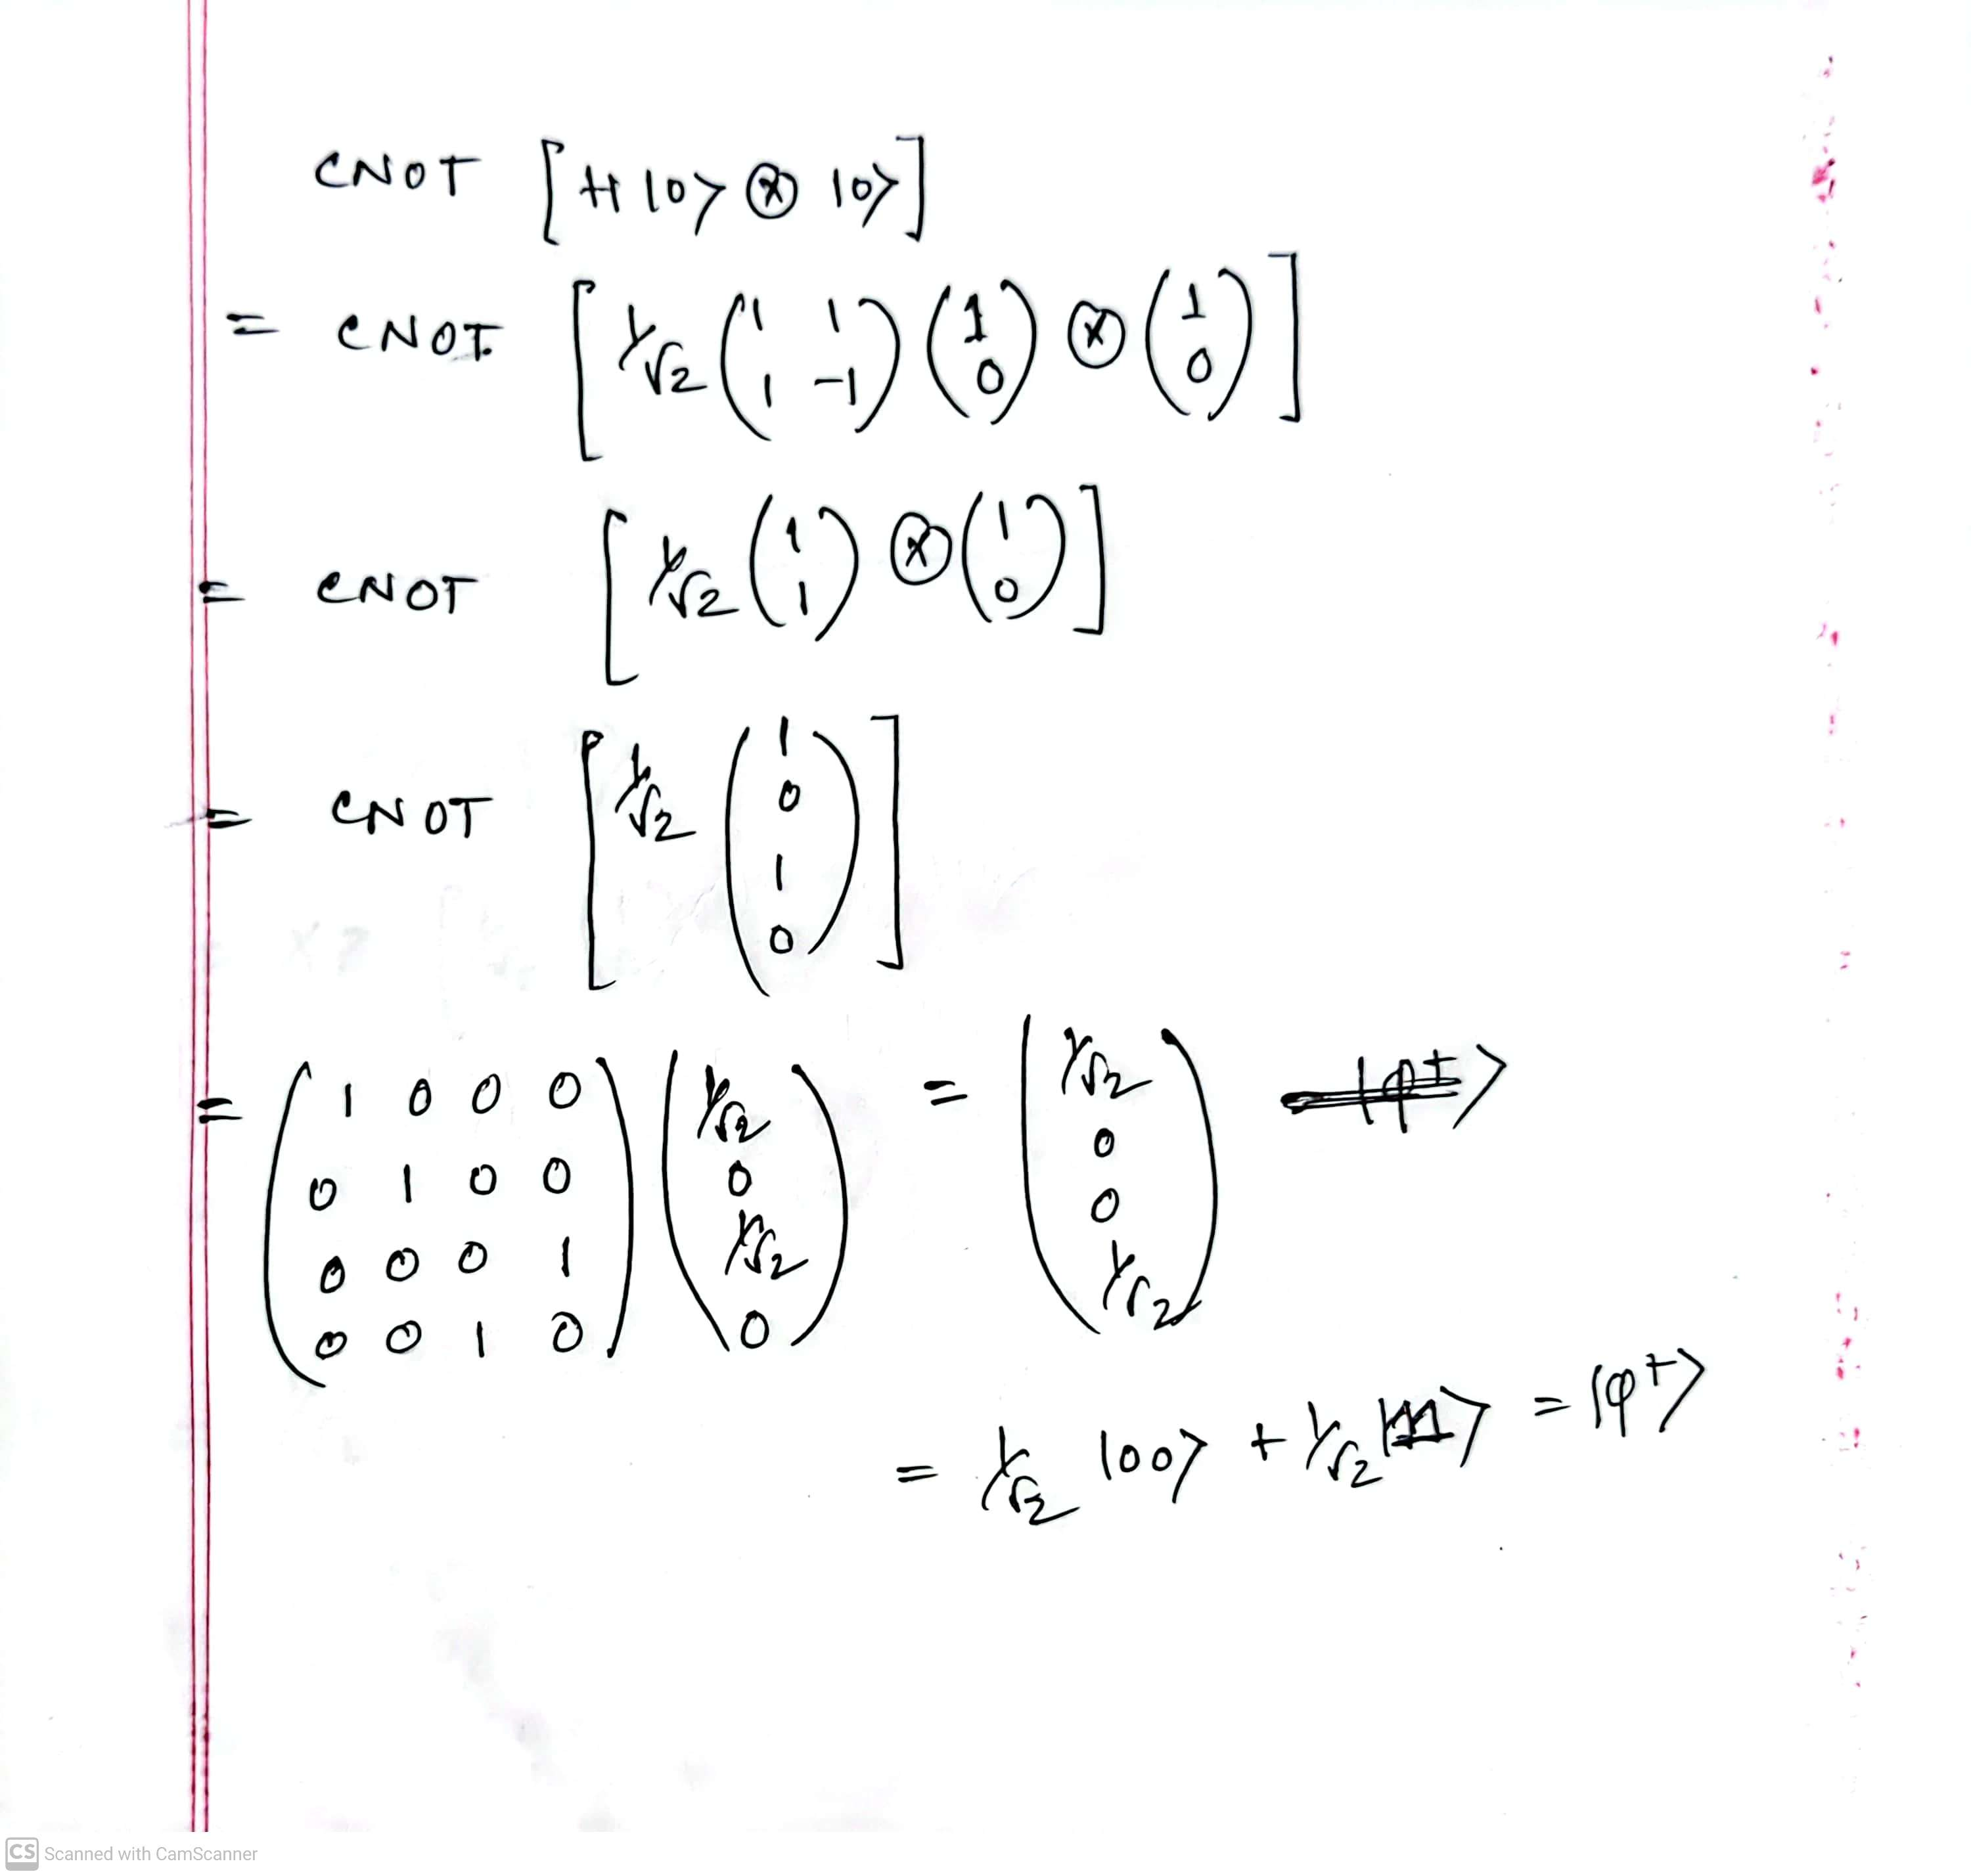

  



**Preparation of psi- state:**
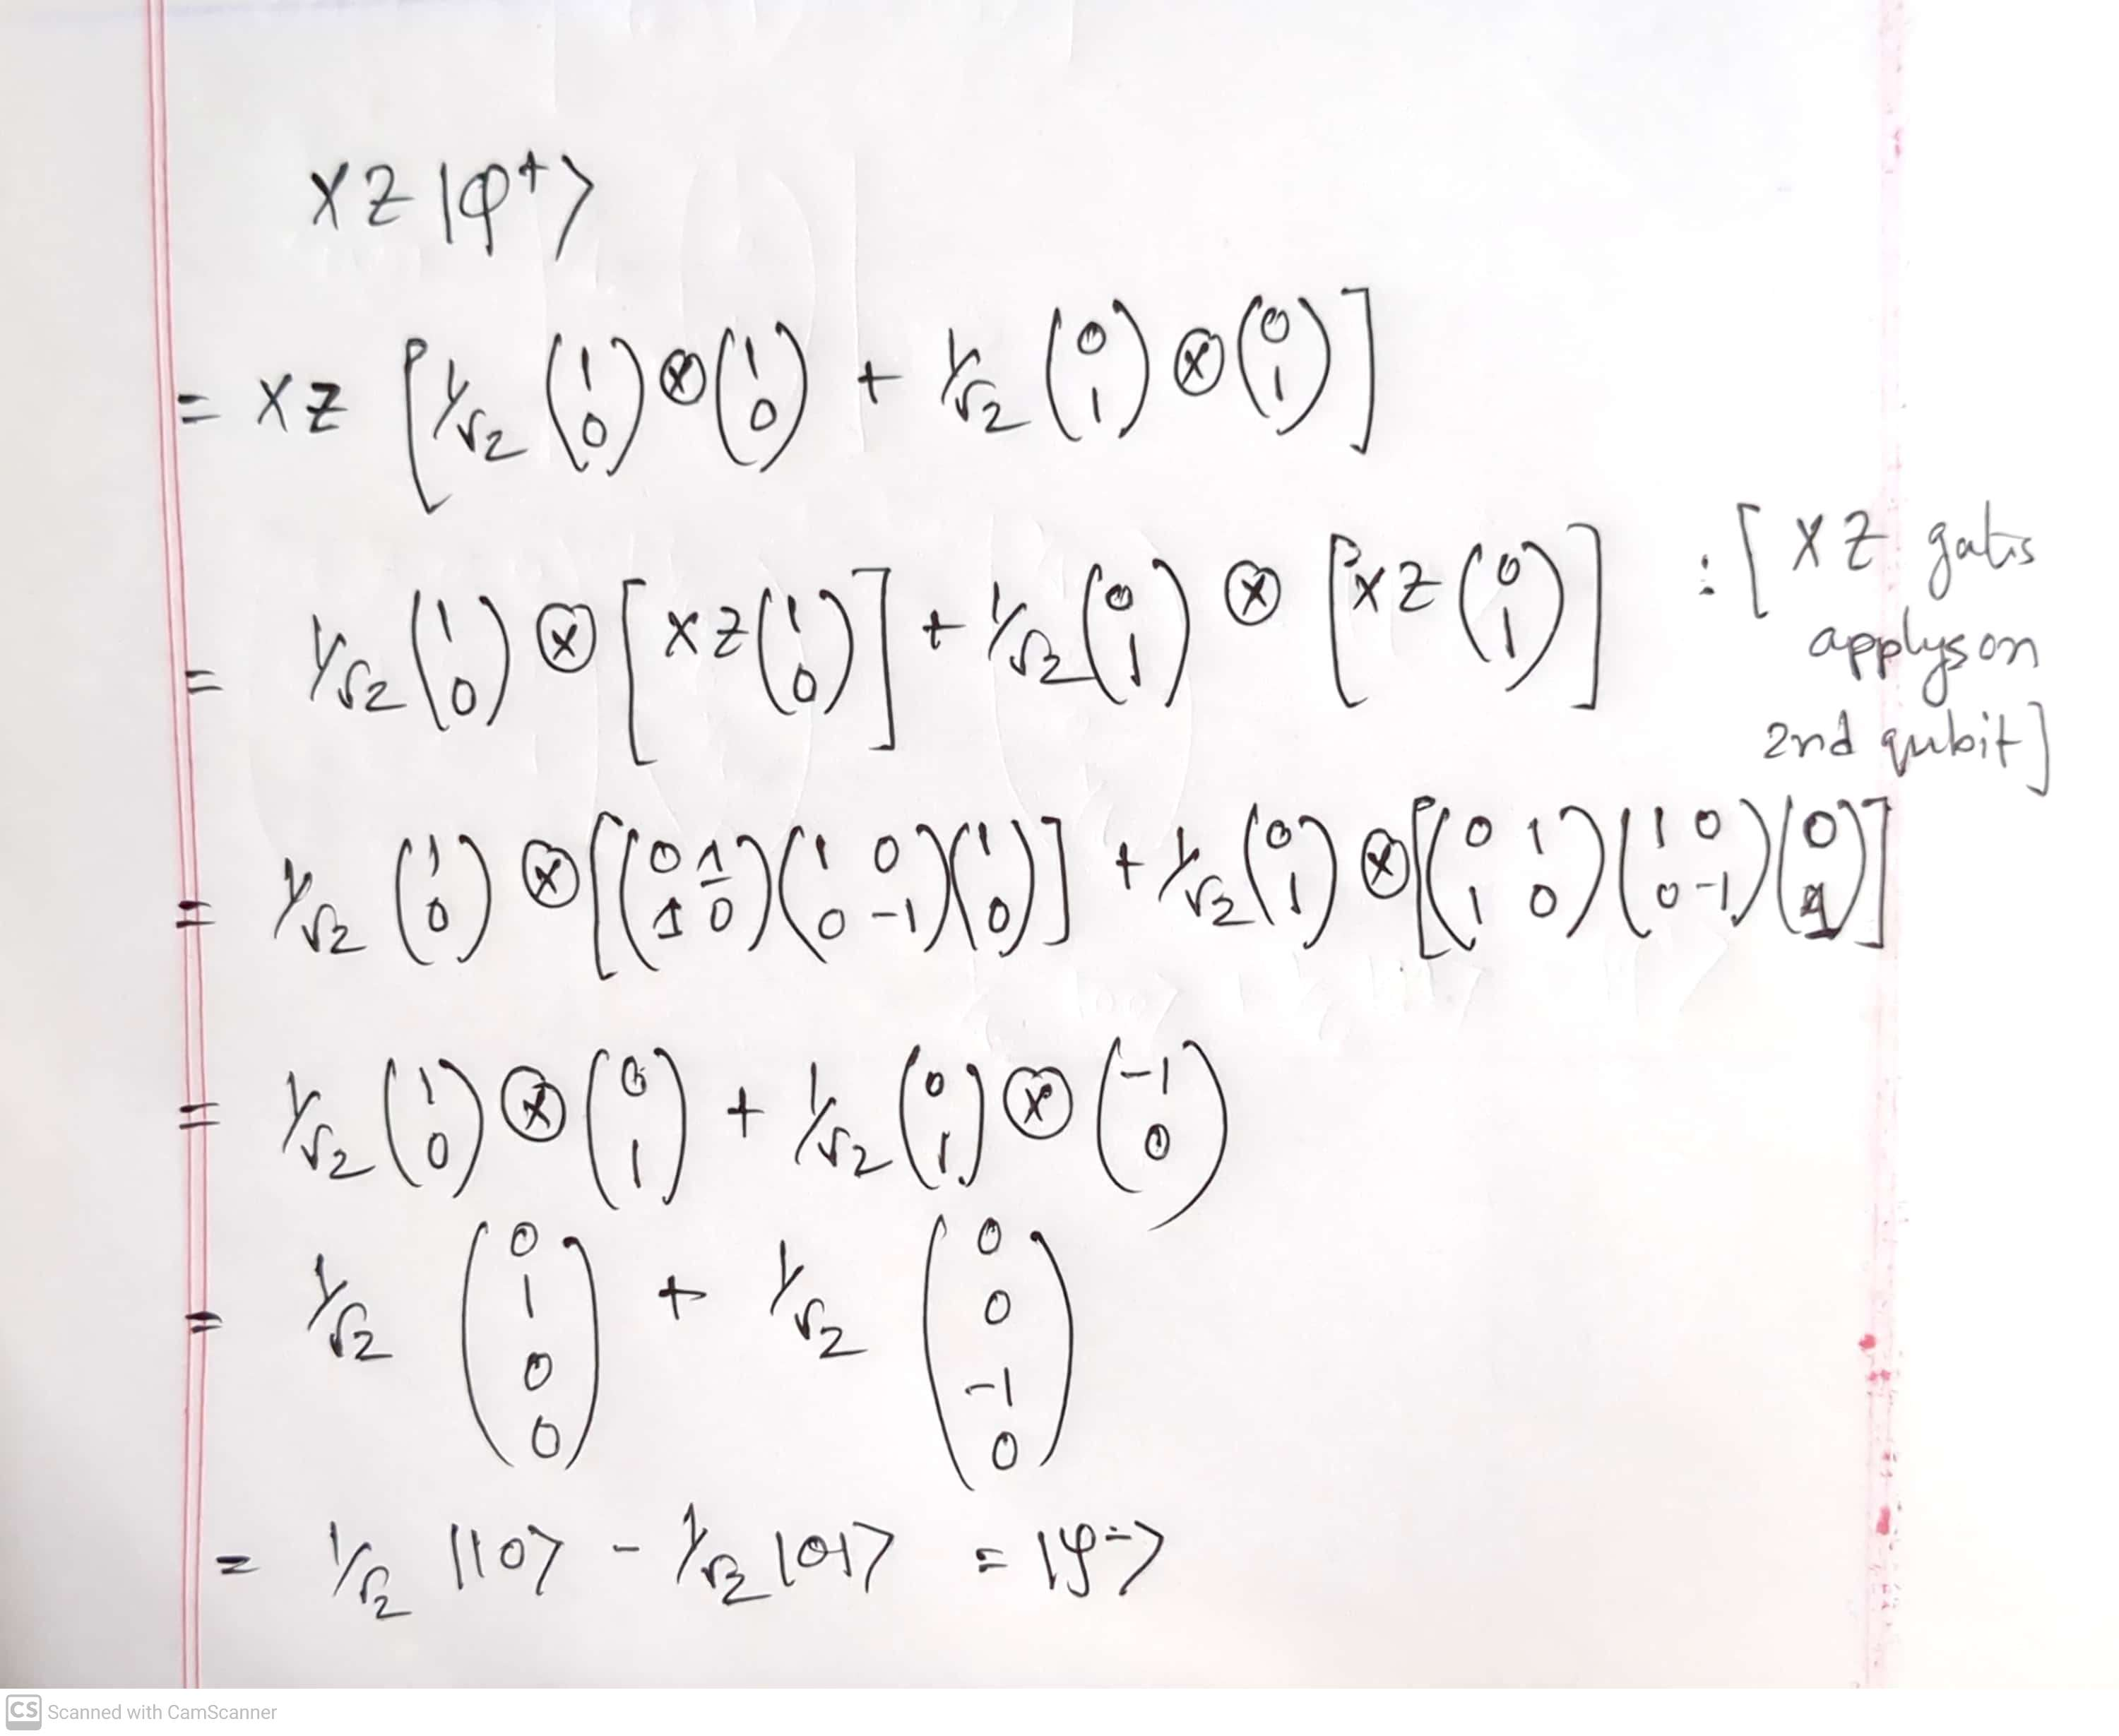

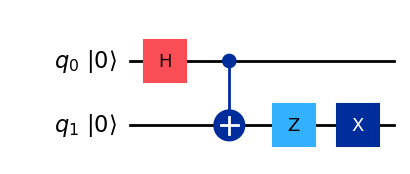

In [55]:
# Draw the circuit
qc.draw(output='mpl', initial_state = True)

In [56]:
# Statevector
statevector = Statevector(qc)

array_to_latex(statevector)

<IPython.core.display.Latex object>

In [57]:
# Measures all qubits and stores it in a single classical register
qc.measure_all()

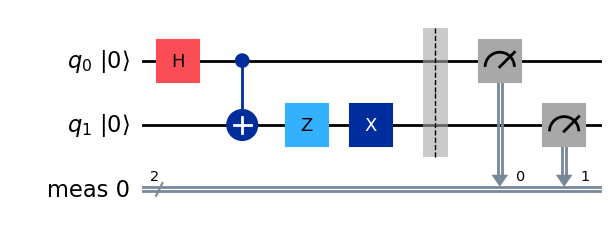

In [58]:
#drawing circuit after measurement
qc.draw(output = 'mpl', initial_state=True)

In [59]:
# Run the circuit in a asimulator 1000 times and print out the result
circ = transpile(qc, AerSimulator())
res = AerSimulator().run(circ, shots = 1000).result()
counts = res.get_counts(circ)
print(counts)

{'10': 488, '01': 512}


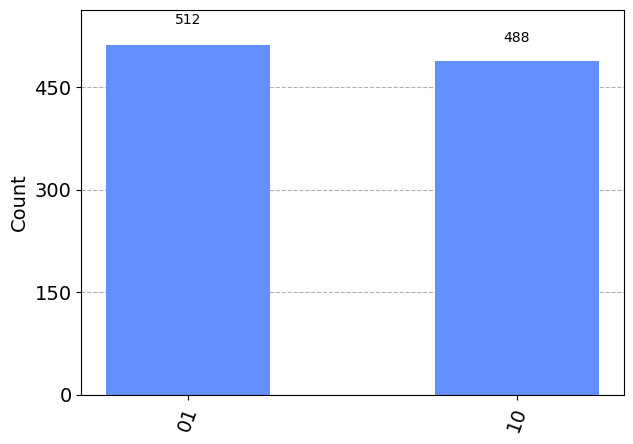

In [60]:
# Showing the result on a histogram
plot_histogram(counts)